## Customer Personality Analysis ##
#### Analysis of company's ideal customers ####

*Some info about dataset:*  
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.  

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Attributes : *4P model* 

People:  
- ID: Customer's unique identifier  
- Year_Birth: Customer's birth year  
- Education: Customer's education level  
- Marital_Status: Customer's marital status  
- Income: Customer's yearly household income  
- Kidhome: Number of children in customer's household  
- Teenhome: Number of teenagers in customer's household  
- Dt_Customer: Date of customer's enrollment with the company  
- Recency: Number of days since customer's last purchase  
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

Products:  
- MntWines: Amount spent on wine in last 2 years  
- MntFruits: Amount spent on fruits in last 2 years  
- MntMeatProducts: Amount spent on meat in last 2 years  
- MntFishProducts: Amount spent on fish in last 2 years  
- MntSweetProducts: Amount spent on sweets in last 2 years  
- MntGoldProds: Amount spent on gold in last 2 years  

Promotion:  
- NumDealsPurchases: Number of purchases made with a discount  
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

Place:  
- NumWebPurchases: Number of purchases made through the company’s website  
- NumCatalogPurchases: Number of purchases made using a catalogue  
- NumStorePurchases: Number of purchases made directly in stores  
- NumWebVisitsMonth: Number of visits to company’s website in the last month  

Target  
Need to perform clustering to summarize customer segments.

#### IMPORT LIBRARIES ####

In [869]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import phik
from phik import report
from phik.report import plot_correlation_matrix
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import  KMeans

#### DATA PREPROCESSING ####

In [870]:
#Loading the dataset
df = pd.read_csv('marketing_campaign.csv',sep = '\t')

In [871]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [872]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [873]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [874]:
#Replacing spaces with underscores for all columns
df.columns = ['ID', 'year_birth', 'education', 'marital_status', 'income', 'kidhome', 
              'teenhome','dt_customer','recency', 'mnt_wines','mnt_fruits',
              'tnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods', 
              'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_stor_purchases', 
              'num_web_visits_month', 'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1', 
              'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response']

In [875]:
#Creation 'age' column
df['age'] = 2023 - df ['year_birth']

In [876]:
#Creation columns wich is sum spent of all groups
df['total_spent'] = (df["mnt_wines"]+ df["mnt_fruits"]+ df["tnt_meat_products"]+ df["mnt_fish_products"]+ 
df["mnt_sweet_products"]+ df["mnt_gold_prods"])

In [877]:
df.isna().mean()

ID                       0.000000
year_birth               0.000000
education                0.000000
marital_status           0.000000
income                   0.010714
kidhome                  0.000000
teenhome                 0.000000
dt_customer              0.000000
recency                  0.000000
mnt_wines                0.000000
mnt_fruits               0.000000
tnt_meat_products        0.000000
mnt_fish_products        0.000000
mnt_sweet_products       0.000000
mnt_gold_prods           0.000000
num_deals_purchases      0.000000
num_web_purchases        0.000000
num_catalog_purchases    0.000000
num_stor_purchases       0.000000
num_web_visits_month     0.000000
accepted_cmp3            0.000000
accepted_cmp4            0.000000
accepted_cmp5            0.000000
accepted_cmp1            0.000000
accepted_cmp2            0.000000
complain                 0.000000
z_cost_contact           0.000000
z_revenue                0.000000
response                 0.000000
age           

In [878]:
df.isna().sum()

ID                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
tnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_stor_purchases        0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
age                       0
total_spent               0
dtype: int64

There is almost perfect dataset! We have only 24 (1,0714%) NULL which is lay in 'income'.

In [879]:
# describe all the columns
df.describe()

,ID,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,tnt_meat_products,mnt_fish_products,...,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,age,total_spent
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196,605.798214
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,396.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,2525.000000


In [880]:
df.dtypes

ID                         int64
year_birth                 int64
education                 object
marital_status            object
income                   float64
kidhome                    int64
teenhome                   int64
dt_customer               object
recency                    int64
mnt_wines                  int64
mnt_fruits                 int64
tnt_meat_products          int64
mnt_fish_products          int64
mnt_sweet_products         int64
mnt_gold_prods             int64
num_deals_purchases        int64
num_web_purchases          int64
num_catalog_purchases      int64
num_stor_purchases         int64
num_web_visits_month       int64
accepted_cmp3              int64
accepted_cmp4              int64
accepted_cmp5              int64
accepted_cmp1              int64
accepted_cmp2              int64
complain                   int64
z_cost_contact             int64
z_revenue                  int64
response                   int64
age                        int64
total_spen

describe all the columns: for categorical features, this method shows: - How many unique values are in the dataset - unique; top values; frequency of occurrence of values - freg. df.describe(include = "all")

In [881]:
df.isna().sum()

ID                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
tnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_stor_purchases        0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
age                       0
total_spent               0
dtype: int64

In [882]:
#Replacing NaN-values in 'income' with modal values
#df[df['income'] == 'nan'] = df['income'].fillna(df['income'].mode()[0])

In [883]:
#Replacing NaN-values in 'income' with modal values
df['income'] = df['income'].fillna(df['income'].mode()[0])

In [884]:
df['income'].describe()

count      2240.000000
mean      51767.816518
std       25458.285477
min        1730.000000
25%       34722.000000
50%       51075.000000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

In [885]:
df.dtypes

ID                         int64
year_birth                 int64
education                 object
marital_status            object
income                   float64
kidhome                    int64
teenhome                   int64
dt_customer               object
recency                    int64
mnt_wines                  int64
mnt_fruits                 int64
tnt_meat_products          int64
mnt_fish_products          int64
mnt_sweet_products         int64
mnt_gold_prods             int64
num_deals_purchases        int64
num_web_purchases          int64
num_catalog_purchases      int64
num_stor_purchases         int64
num_web_visits_month       int64
accepted_cmp3              int64
accepted_cmp4              int64
accepted_cmp5              int64
accepted_cmp1              int64
accepted_cmp2              int64
complain                   int64
z_cost_contact             int64
z_revenue                  int64
response                   int64
age                        int64
total_spen

In [886]:
plt.style.use('dark_background')

In [887]:
df['year_birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: year_birth, dtype: float64

In [888]:
df['age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: age, dtype: float64

<AxesSubplot:>

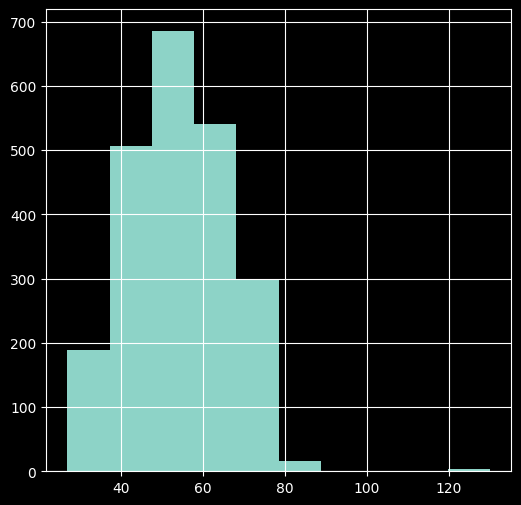

In [889]:
df['age'].hist(figsize=(6,6))

c:\Users\Lena\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


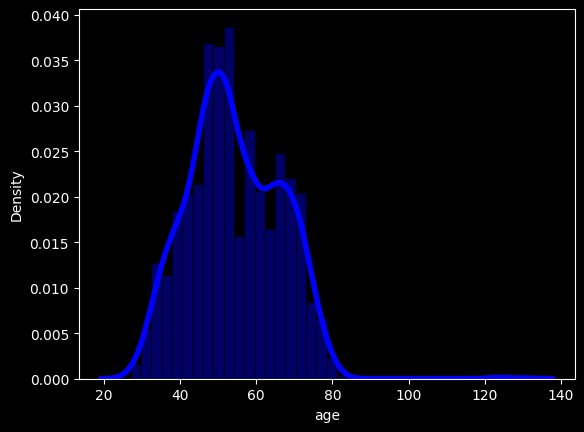

In [890]:
sns.distplot(df['age'], hist=True, kde=True, 
            color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [891]:
df['age'].quantile(0.99)

78.0

In [892]:
df[df['age'] > (df['age'].quantile(0.99))]

,ID,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,age,total_spent
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,0,0,0,0,0,3,11,1,80,902
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,1,3,11,0,123,65
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,3,11,0,130,22
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,1,0,0,0,3,11,0,124,1853
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,...,0,0,0,0,1,3,11,0,80,900
415,7106,1943,PhD,Married,75865.0,0,0,31-03-2014,73,483,...,0,0,0,0,0,3,11,0,80,1242
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,0,1,0,0,0,3,11,0,82,2119
494,6605,1944,PhD,Divorced,55614.0,0,0,27-11-2013,85,504,...,1,0,0,0,0,3,11,0,79,682
499,466,1944,Graduation,Married,65275.0,0,0,03-04-2013,9,388,...,0,0,0,0,0,3,11,0,79,746
519,3711,1944,Master,Married,80184.0,0,0,01-03-2014,19,1035,...,0,1,1,0,0,3,11,0,79,1902


≈ 0.01% of customers lie in age more then 78y.o. If speak more, in this percent include 19 customers.  Let's replase this data with modal-value.

In [893]:
df.loc[df['age'] > (df['age'].quantile(0.99)), 'age'] = df['age'].mode()[0]

c:\Users\Lena\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


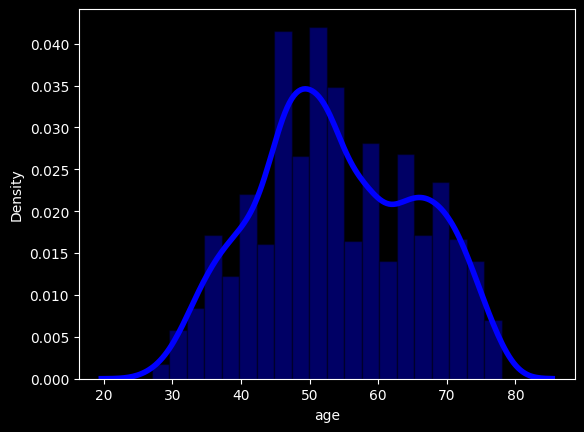

In [894]:
sns.distplot(df['age'], hist=True, kde=True, 
            color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [895]:
df['age'].describe()

count    2240.000000
mean       53.854018
std        11.504883
min        27.000000
25%        46.000000
50%        53.000000
75%        63.000000
max        78.000000
Name: age, dtype: float64

In [896]:
df['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [897]:
df['education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

In [898]:
#Create columns with count of children of customer
df['children'] = df['kidhome'] +df ['teenhome']

In [899]:
df['marital_status'].value_counts(dropna=False)

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

I suggest to combine some values.

In [900]:
d = {'Married':'Married',
     'Together':'Together',
     'Single':'Single',
     'Divorced':'Single',
     'Widow':'Single',
     'Alone':'Single',
     'Absurd':'Single',
     'YOLO': 'Single',
     }

In [901]:
df['marital_status'] = df['marital_status'].map(d)

In [902]:
df['marital_status'].value_counts()

Married     864
Single      796
Together    580
Name: marital_status, dtype: int64

In [903]:
df

,ID,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,age,total_spent,children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,66,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,69,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,58,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,39,53,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,42,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,56,1341,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,77,444,3
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,42,1241,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,67,843,1


In [904]:
df['income'].describe()

count      2240.000000
mean      51767.816518
std       25458.285477
min        1730.000000
25%       34722.000000
50%       51075.000000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

In [905]:
df.isna().sum()

ID                       0
year_birth               0
education                0
marital_status           0
income                   0
kidhome                  0
teenhome                 0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
tnt_meat_products        0
mnt_fish_products        0
mnt_sweet_products       0
mnt_gold_prods           0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_stor_purchases       0
num_web_visits_month     0
accepted_cmp3            0
accepted_cmp4            0
accepted_cmp5            0
accepted_cmp1            0
accepted_cmp2            0
complain                 0
z_cost_contact           0
z_revenue                0
response                 0
age                      0
total_spent              0
children                 0
dtype: int64

c:\Users\Lena\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

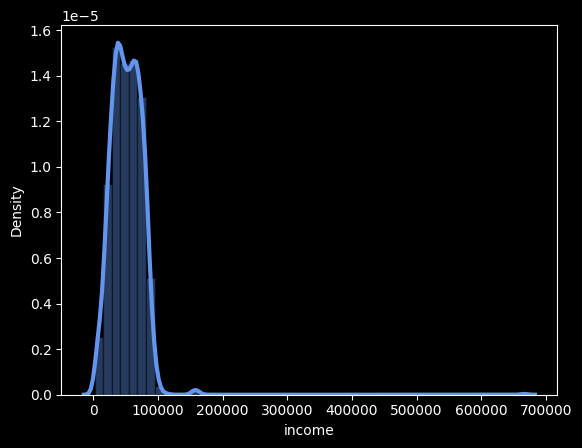

In [906]:
sns.distplot(df['income'], hist=True, kde=True, 
            color = 'cornflowerblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

In [907]:
df['income'].sort_values().tail(30)

426      92910.0
966      92955.0
424      93027.0
826      93404.0
1458     93790.0
943      94384.0
1301     94384.0
1993     94472.0
1982     94642.0
1473     94871.0
1001     95169.0
914      95529.0
1995     96547.0
1958     96843.0
2012     96876.0
650      98777.0
1113     98777.0
124     101970.0
203     102160.0
252     102692.0
646     105471.0
1898    113734.0
655     153924.0
2132    156924.0
1653    157146.0
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: income, dtype: float64

There are obviously anomalies in data. I can't  say that small values is anomal, by the way,they lay near other values. 
But there is customer with incom 666666.0. I replace this value with modal.

In [908]:
df.isna().sum()

ID                       0
year_birth               0
education                0
marital_status           0
income                   0
kidhome                  0
teenhome                 0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
tnt_meat_products        0
mnt_fish_products        0
mnt_sweet_products       0
mnt_gold_prods           0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_stor_purchases       0
num_web_visits_month     0
accepted_cmp3            0
accepted_cmp4            0
accepted_cmp5            0
accepted_cmp1            0
accepted_cmp2            0
complain                 0
z_cost_contact           0
z_revenue                0
response                 0
age                      0
total_spent              0
children                 0
dtype: int64

In [909]:
#moda= df['income'].mode()[0]
df['income'].replace(666666.0, df['income'].mode()[0],inplace=True)

In [910]:
df.isna().sum()

ID                       0
year_birth               0
education                0
marital_status           0
income                   0
kidhome                  0
teenhome                 0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
tnt_meat_products        0
mnt_fish_products        0
mnt_sweet_products       0
mnt_gold_prods           0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_stor_purchases       0
num_web_visits_month     0
accepted_cmp3            0
accepted_cmp4            0
accepted_cmp5            0
accepted_cmp1            0
accepted_cmp2            0
complain                 0
z_cost_contact           0
z_revenue                0
response                 0
age                      0
total_spent              0
children                 0
dtype: int64

In [911]:
df['income'].describe()

count      2240.000000
mean      51473.545982
std       21909.882797
min        1730.000000
25%       34686.250000
50%       51025.500000
75%       68275.750000
max      162397.000000
Name: income, dtype: float64

c:\Users\Lena\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


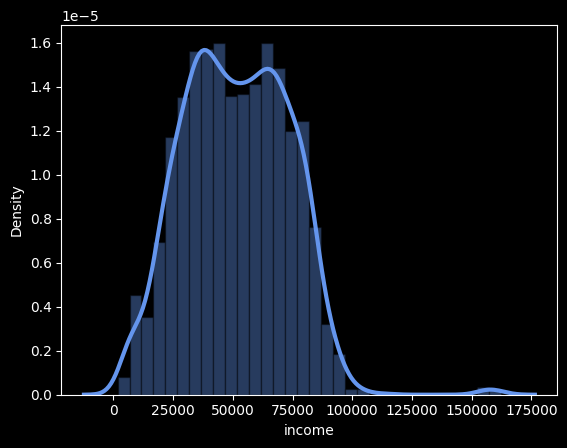

In [912]:
sns.distplot(df['income'], hist=True, kde=True, 
            color = 'cornflowerblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

In [913]:
df['income'].isna().value_counts()

False    2240
Name: income, dtype: int64

In [914]:
#Dropping some of the redundant features
to_drop = ["kidhome", 'teenhome', "z_cost_contact", "z_revenue", "year_birth", 'ID']
df = df.drop(to_drop, axis=1)

In [915]:
df

,education,marital_status,income,dt_customer,recency,mnt_wines,mnt_fruits,tnt_meat_products,mnt_fish_products,mnt_sweet_products,...,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,response,age,total_spent,children
0,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,0,1,66,1617,0
1,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,0,0,0,69,27,2
2,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,0,0,0,0,58,776,0
3,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,0,0,0,0,39,53,1
4,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,0,0,0,0,42,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,13-06-2013,46,709,43,182,42,118,...,0,0,0,0,0,0,0,56,1341,1
2236,PhD,Together,64014.0,10-06-2014,56,406,0,30,0,0,...,0,0,0,1,0,0,0,77,444,3
2237,Graduation,Single,56981.0,25-01-2014,91,908,48,217,32,12,...,0,1,0,0,0,0,0,42,1241,0
2238,Master,Together,69245.0,24-01-2014,8,428,30,214,80,30,...,0,0,0,0,0,0,0,67,843,1


### DATA EXPLORATION AND VISUALIZATION ###

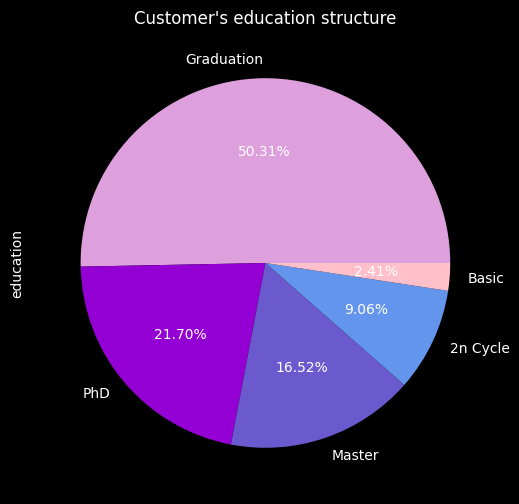

In [916]:
df['education'].value_counts().plot(kind = 'pie', figsize= (6,6), autopct= '%.2f%%', 
                                  title = 'Customer\'s education structure', colors = ['plum','darkviolet','slateblue','cornflowerblue','pink']);

In [917]:
df['education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: education, dtype: object

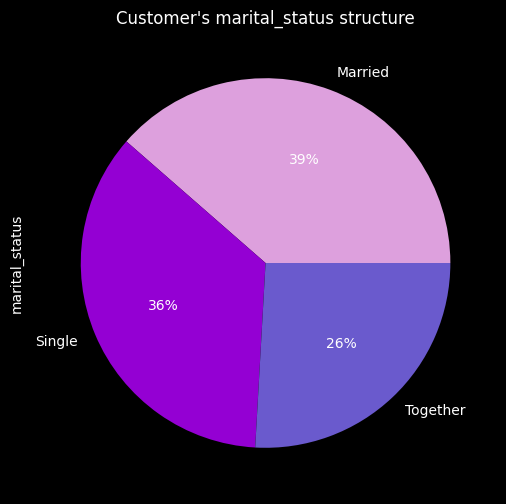

In [918]:
df['marital_status'].value_counts().plot(kind = 'pie', figsize= (6,6), autopct='%1.0f%%', 
                                  title = 'Customer\'s marital_status structure', colors = ['plum','darkviolet','slateblue','cornflowerblue','pink']);

In [919]:
df['marital_status'].describe()

count        2240
unique          3
top       Married
freq          864
Name: marital_status, dtype: object

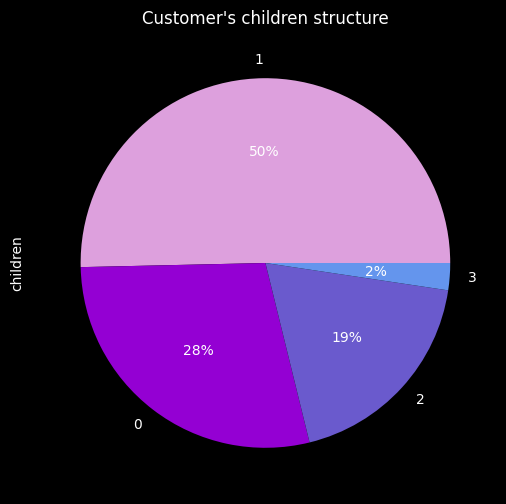

In [920]:
df['children'].value_counts().plot(kind = 'pie', figsize= (6,6), autopct='%1.0f%%',
                                  title = 'Customer\'s children structure', colors = ['plum','darkviolet','slateblue','cornflowerblue','pink']);

In [921]:
df['children'].describe()

count    2240.000000
mean        0.950446
std         0.751803
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: children, dtype: float64

- most of the clients graduated from an educational institution (school, I suppose); 
- almost a quarter of Doctors of Sciences and a little more than a quarter  
- 39% of clients are married, 36% are single, 26% are in relationship. Thus, we can generalize and say that most of them have a partner  
- 50% of clients have 1 child, 28 do not have children. 19% have two children. Three children have 2% of customers.

In [922]:
df['income_group'] =  pd.cut(df['income'],5)

In [923]:
df['income_group'].value_counts()

(33863.4, 65996.8]      1086
(65996.8, 98130.2]       615
(1569.333, 33863.4]      525
(98130.2, 130263.6]        7
(130263.6, 162397.0]       7
Name: income_group, dtype: int64

<AxesSubplot:>

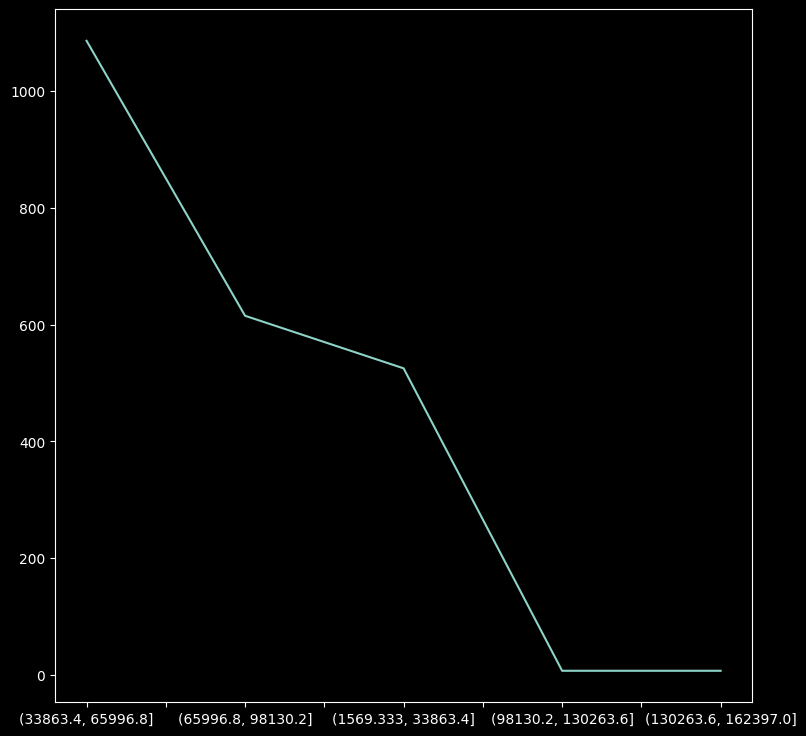

In [924]:
df['income_group'].value_counts().plot(figsize=(9,9))

In [925]:
df['income'].describe()

count      2240.000000
mean      51473.545982
std       21909.882797
min        1730.000000
25%       34686.250000
50%       51025.500000
75%       68275.750000
max      162397.000000
Name: income, dtype: float64

Most of the clients have income in the range from 33863.4 to 65996.8.

In [926]:
df

,education,marital_status,income,dt_customer,recency,mnt_wines,mnt_fruits,tnt_meat_products,mnt_fish_products,mnt_sweet_products,...,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,response,age,total_spent,children,income_group
0,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,1,66,1617,0,"(33863.4, 65996.8]"
1,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,0,0,69,27,2,"(33863.4, 65996.8]"
2,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,0,0,0,58,776,0,"(65996.8, 98130.2]"
3,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,0,0,0,39,53,1,"(1569.333, 33863.4]"
4,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,0,0,0,42,422,1,"(33863.4, 65996.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,13-06-2013,46,709,43,182,42,118,...,0,0,0,0,0,0,56,1341,1,"(33863.4, 65996.8]"
2236,PhD,Together,64014.0,10-06-2014,56,406,0,30,0,0,...,0,0,1,0,0,0,77,444,3,"(33863.4, 65996.8]"
2237,Graduation,Single,56981.0,25-01-2014,91,908,48,217,32,12,...,1,0,0,0,0,0,42,1241,0,"(33863.4, 65996.8]"
2238,Master,Together,69245.0,24-01-2014,8,428,30,214,80,30,...,0,0,0,0,0,0,67,843,1,"(65996.8, 98130.2]"


In [927]:
df.isna().sum()

education                0
marital_status           0
income                   0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
tnt_meat_products        0
mnt_fish_products        0
mnt_sweet_products       0
mnt_gold_prods           0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_stor_purchases       0
num_web_visits_month     0
accepted_cmp3            0
accepted_cmp4            0
accepted_cmp5            0
accepted_cmp1            0
accepted_cmp2            0
complain                 0
response                 0
age                      0
total_spent              0
children                 0
income_group             0
dtype: int64

In [928]:
####dist_custom(dataset=df_filtered, columns_list=numeric_columns_to_filter[3:], 
           ### rows=2, cols=4, suptitle='Distibution for each variable', size=(16,10), y=0.95)

<AxesSubplot:>

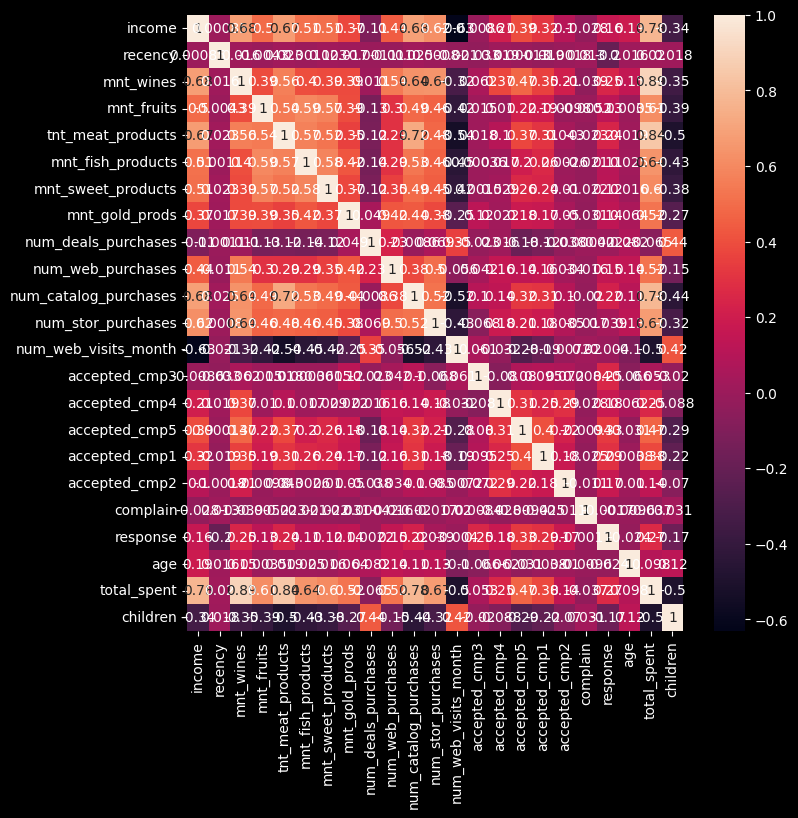

In [929]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True)

I'll create new table with nessesary for analysis feature.

In [930]:
t = df[['income','age','total_spent', 'children','marital_status']].copy()

<AxesSubplot:>

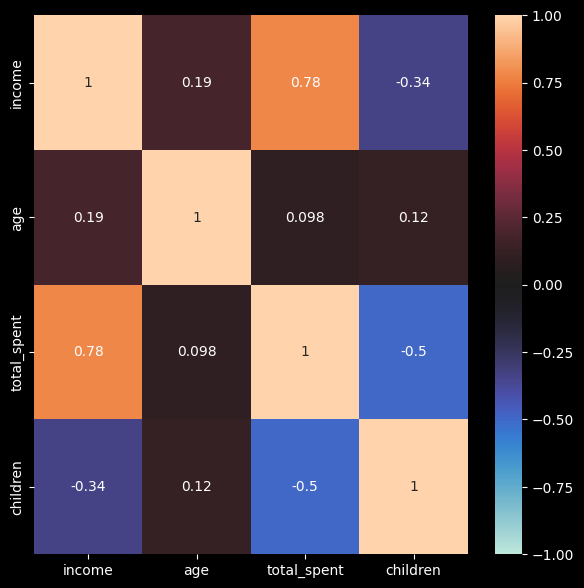

In [931]:
plt.figure(figsize=(7,7))
sns.heatmap(t.corr(), annot=True,vmin=-1, vmax=1, center= 0)

In [932]:
phik_overview = t.phik_matrix()

interval columns not set, guessing: ['income', 'age', 'total_spent', 'children']


In [933]:
phik_overview

,income,age,total_spent,children,marital_status
income,1.000000,0.244054,0.650150,0.632814,0.000000
age,0.244054,1.000000,0.213919,0.312735,0.142758
total_spent,0.650150,0.213919,1.000000,0.503669,0.000000
children,0.632814,0.312735,0.503669,1.000000,0.025157
marital_status,0.000000,0.142758,0.000000,0.025157,1.000000


The relationship is linear. Customers having higher salaries are spending more

In [934]:
#Encoding categorical labels
le=preprocessing.LabelEncoder()

for i in t:
    t[i]=t[[i]].apply(le.fit_transform)

In [935]:
t

,income,age,total_spent,children,marital_status
0,1170,39,907,0,1
1,832,42,21,2,1
2,1567,31,503,0,2
3,241,12,47,1,2
4,1173,15,320,1,0
...,...,...,...,...,...
2235,1253,29,799,1,0
2236,1339,50,335,3,2
2237,1133,15,759,0,1
2238,1491,40,537,1,2


<AxesSubplot:>

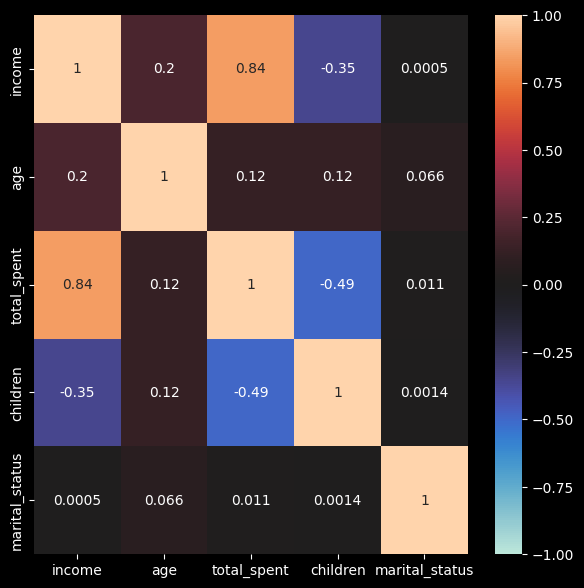

In [936]:
plt.figure(figsize=(7,7))
sns.heatmap(t.corr(), annot=True,vmin=-1, vmax=1, center= 0)

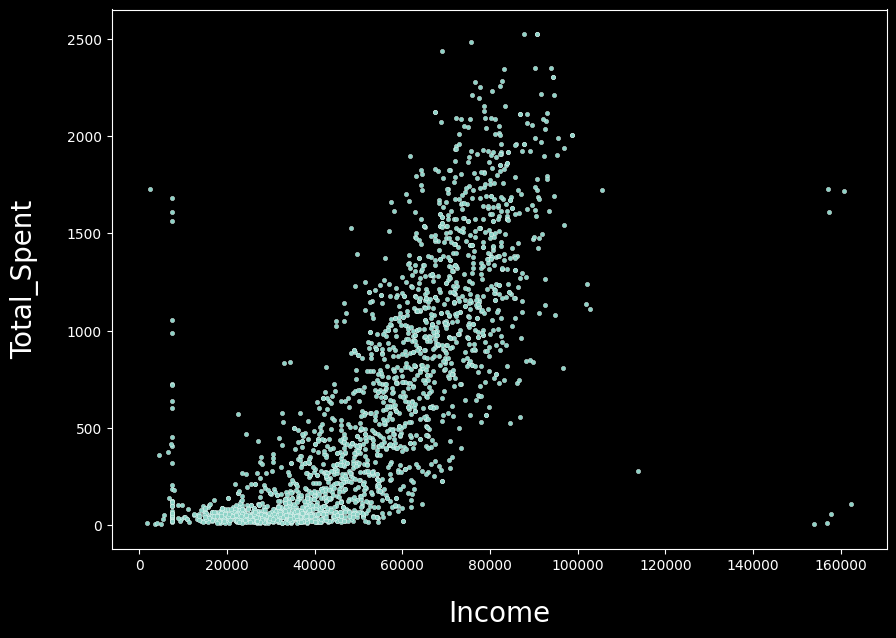

In [937]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['income'], y=df['total_spent'], s=10);

plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total_Spent', fontsize=20, labelpad=20);

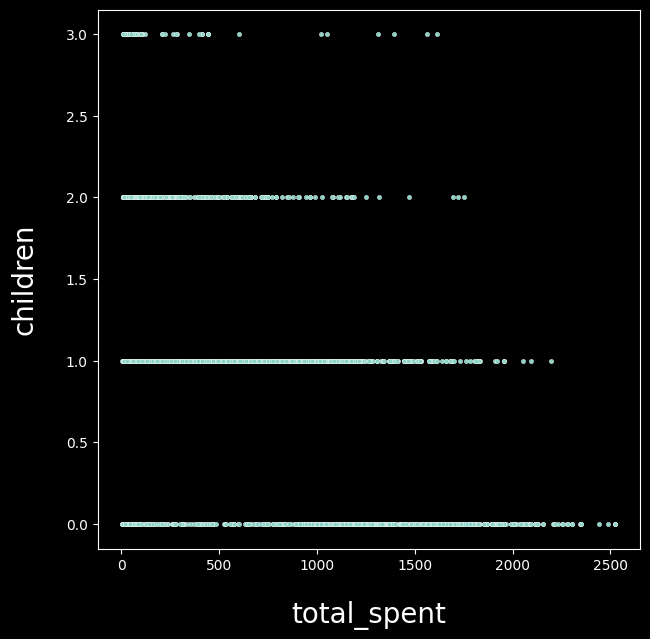

In [938]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['total_spent'], y=df['children'], s=10);

plt.xlabel('total_spent', fontsize=20, labelpad=20)
plt.ylabel('children', fontsize=20, labelpad=20);

#у всех сочетаний продуктов с детьми
Let's see some combinations like "childen = product"

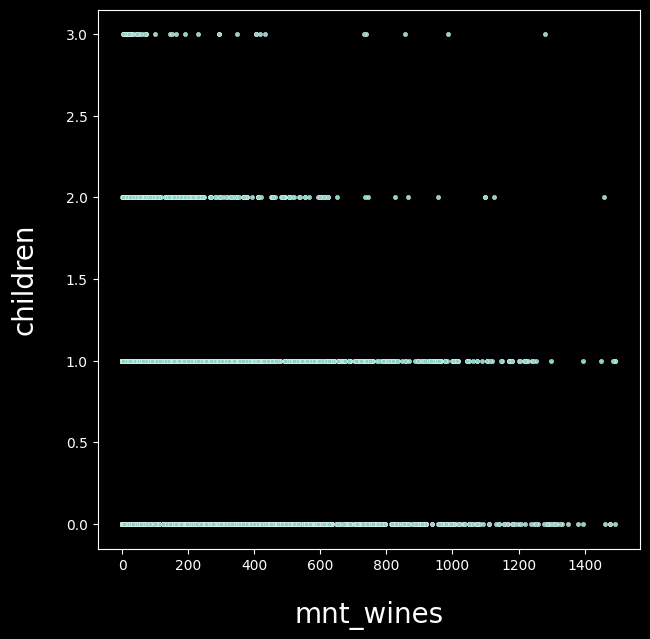

In [939]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['mnt_wines'], y=df['children'], s=10);

plt.xlabel('mnt_wines', fontsize=20, labelpad=20)
plt.ylabel('children', fontsize=20, labelpad=20);

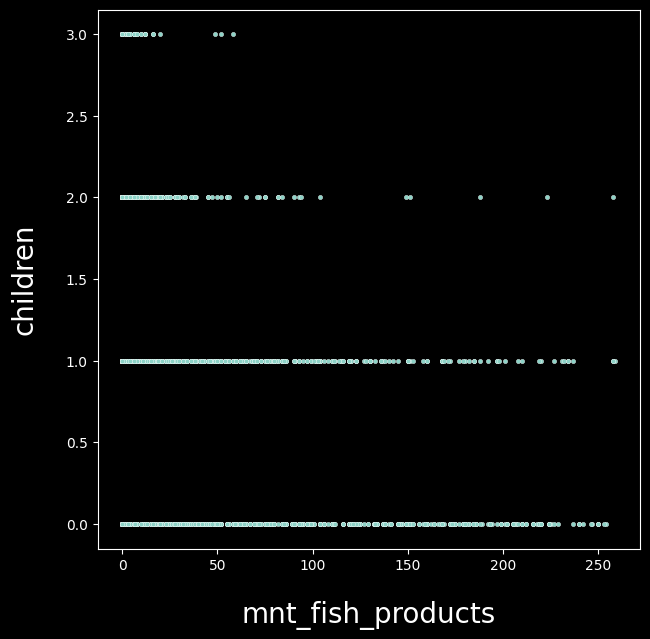

In [940]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['mnt_fish_products'], y=df['children'], s=10);

plt.xlabel('mnt_fish_products', fontsize=20, labelpad=20)
plt.ylabel('children', fontsize=20, labelpad=20);

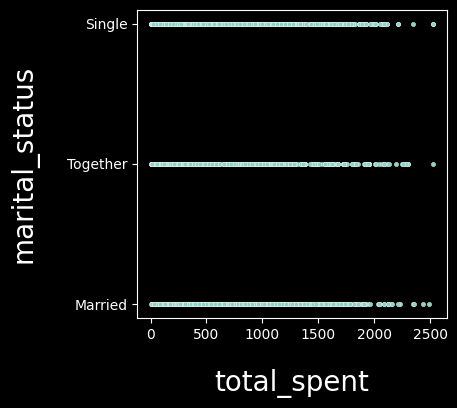

In [941]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=df['total_spent'], y=df['marital_status'], s=10);

plt.xlabel('total_spent', fontsize=20, labelpad=20)
plt.ylabel('marital_status', fontsize=20, labelpad=20);

There is an almost obvious pattern here: the more children a client has, the lower his expenses on average.

In [942]:
d = {'Married':'Relationship',
     'Together':'Relationship',
     'Single':'Single',
     'Widow':'Single',
     'Alone':'Single',
     'Absurd':'Single',
     'YOLO': 'Single',
     }

In [943]:
df['marital_status'] = df['marital_status'].map(d)

In [944]:
df['marital_status'].value_counts()

Relationship    1444
Single           796
Name: marital_status, dtype: int64

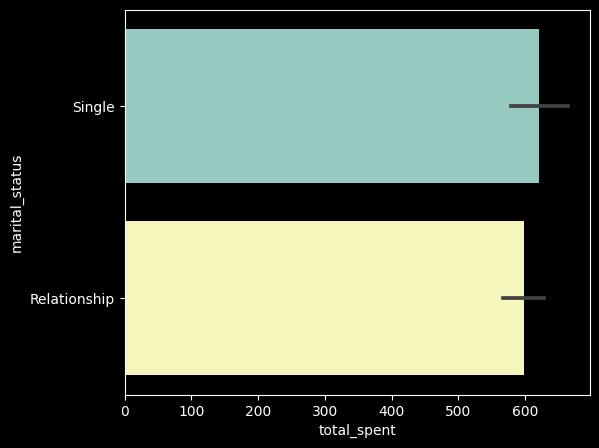

In [945]:
plt.figure(figsize=(6,5))
sns.barplot(x=df['total_spent'], y=df['marital_status']);

In [946]:
product = df[['mnt_wines','mnt_fruits','tnt_meat_products','mnt_fish_products','mnt_sweet_products','mnt_gold_prods']]

In [947]:
product_means = product.mean(axis=0).sort_values(ascending=False)

In [948]:
product_means

mnt_wines             303.935714
tnt_meat_products     166.950000
mnt_gold_prods         44.021875
mnt_fish_products      37.525446
mnt_sweet_products     27.062946
mnt_fruits             26.302232
dtype: float64

<AxesSubplot:>

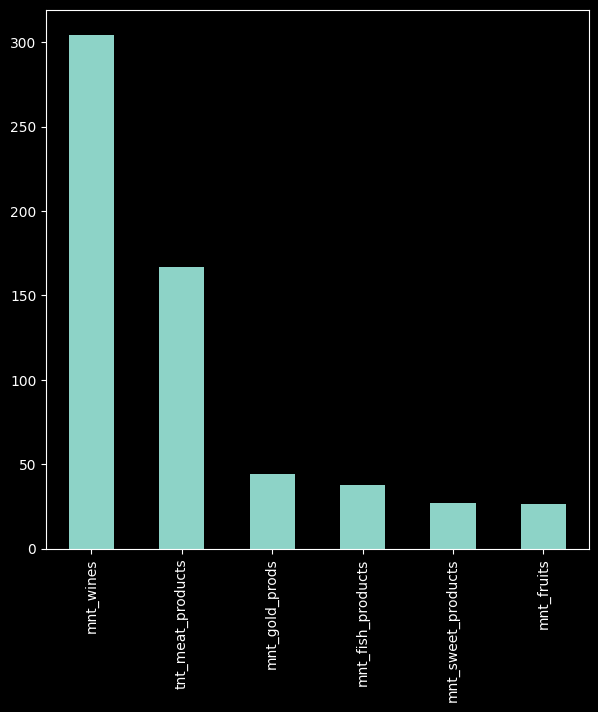

In [949]:
product_means.plot(kind='bar',figsize=(7,7))

- Wine and Meats products are the most famous products among the customers  
- Sweets and Fruits are not being purchased often


In [950]:
df.columns

Index(['education', 'marital_status', 'income', 'dt_customer', 'recency',
       'mnt_wines', 'mnt_fruits', 'tnt_meat_products', 'mnt_fish_products',
       'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases',
       'num_web_purchases', 'num_catalog_purchases', 'num_stor_purchases',
       'num_web_visits_month', 'accepted_cmp3', 'accepted_cmp4',
       'accepted_cmp5', 'accepted_cmp1', 'accepted_cmp2', 'complain',
       'response', 'age', 'total_spent', 'children', 'income_group'],
      dtype='object')

## Clastering ##

##### FINDING AN OPTIMAL COUNT OF CLUSTER.ELBOW METHOD. #####

In [951]:
plt.style.use('default')

In [952]:
from yellowbrick.cluster import KElbowVisualizer

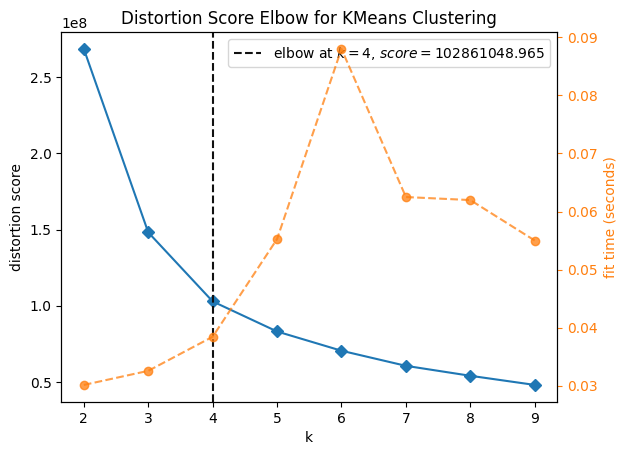

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [953]:
plt_elb = KElbowVisualizer(KMeans(), k=9)
plt_elb.fit(t)
plt_elb.show()


For the above-given graph, the optimum value for K would be 4. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS. For example, from cluster 1 to 2 to 3 in the above graph we see a sudden and huge drop in WCSS. After 4 the drop is minimal and hence we chose 4 to be the optimal value for K.


Gaussian Mixture Model (GMM)

In [954]:
from sklearn.mixture import GaussianMixture
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(t)

GaussianMixture(n_components=4)

In [955]:
cluster_labels = gmm_model.predict(t)
X = pd.DataFrame(t)
X['cluster'] = cluster_labels

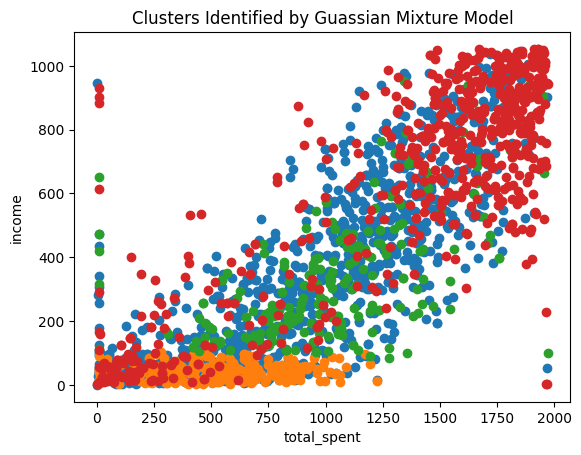

In [956]:
for k in range(0,n_clusters):
    data = t[t['cluster']==k]
    plt.scatter(data['income'],data['total_spent'])
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('income')
plt.xlabel('total_spent')
plt.show()

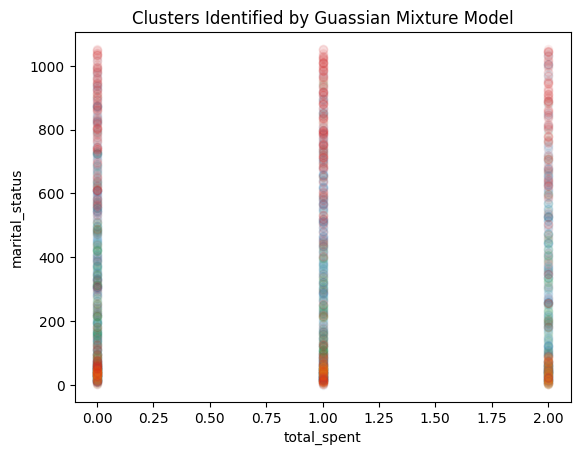

In [957]:
for k in range(0,n_clusters):
    data = t[t['cluster']==k]
    plt.scatter(data['marital_status'],data['total_spent'],alpha = 0.05)
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('marital_status')
plt.xlabel('total_spent')
plt.show()

In [958]:
t

,income,age,total_spent,children,marital_status,cluster
0,1170,39,907,0,1,3
1,832,42,21,2,1,1
2,1567,31,503,0,2,3
3,241,12,47,1,2,0
4,1173,15,320,1,0,0
...,...,...,...,...,...,...
2235,1253,29,799,1,0,0
2236,1339,50,335,3,2,2
2237,1133,15,759,0,1,3
2238,1491,40,537,1,2,0


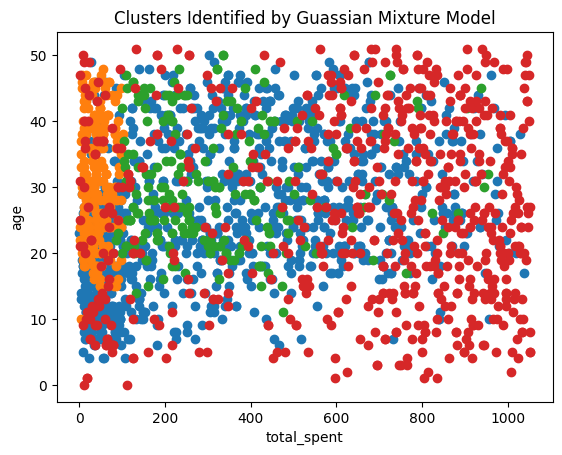

In [959]:
for k in range(0,n_clusters):
    data = t[t['cluster']==k]
    plt.scatter(data['total_spent'],data['age'])
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('age')
plt.xlabel('total_spent')
plt.show()

In [960]:
df['total_spent'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: total_spent, dtype: float64

So, we see a large data scatter in all parameters. I don't like this method, I'll use K-means.

### KMEANS MODEL ###

In [961]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(t)

preds = model.predict(t)

customer_kmeans = t.copy()
customer_kmeans['cluster'] = preds

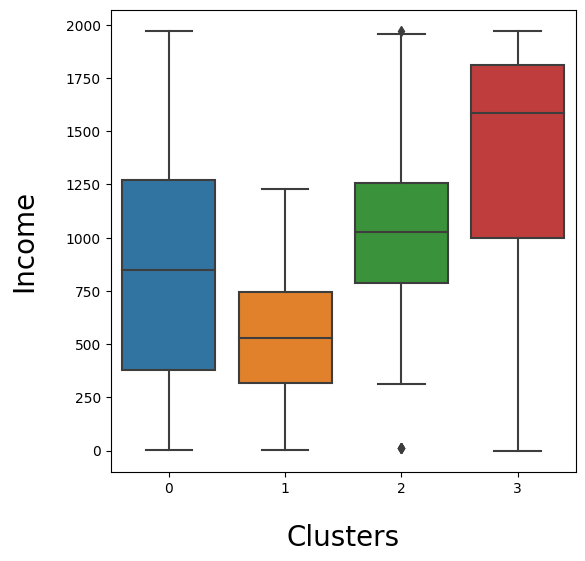

In [962]:
plt.figure(figsize=(6,6))

sns.boxplot(data=t, x='cluster', y = 'income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

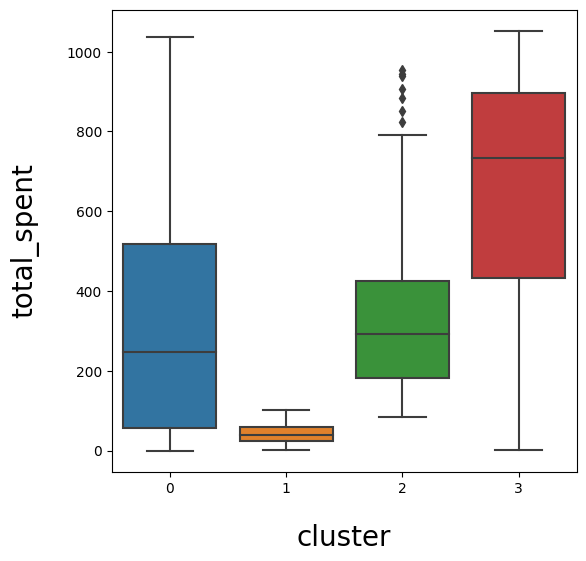

In [963]:
plt.figure(figsize=(6,6))

sns.boxplot(data=t, x='cluster', y = 'total_spent');
plt.xlabel('cluster', fontsize=20, labelpad=20)
plt.ylabel('total_spent', fontsize=20, labelpad=20);

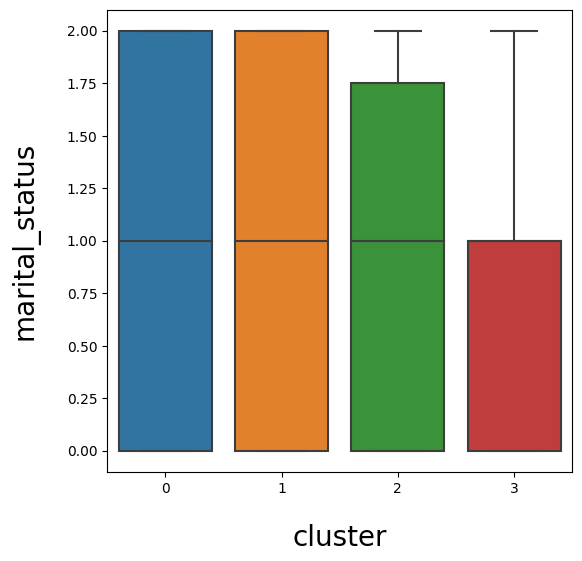

In [964]:
plt.figure(figsize=(6,6))

sns.boxplot(data=t, x='cluster', y = 'marital_status');
plt.xlabel('cluster', fontsize=20, labelpad=20)
plt.ylabel('marital_status', fontsize=20, labelpad=20);

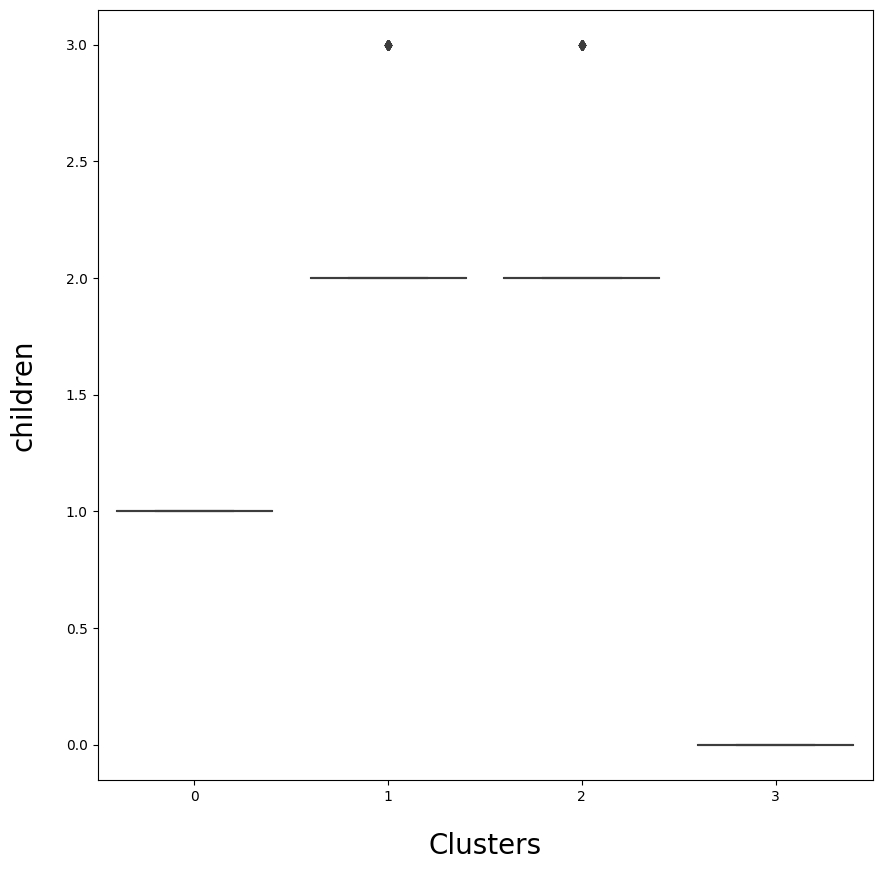

In [965]:
plt.figure(figsize=(10,10))

sns.boxplot(data=t, x='cluster', y = 'children');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('children', fontsize=20, labelpad=20);

In [966]:
t

,income,age,total_spent,children,marital_status,cluster
0,1170,39,907,0,1,3
1,832,42,21,2,1,1
2,1567,31,503,0,2,3
3,241,12,47,1,2,0
4,1173,15,320,1,0,0
...,...,...,...,...,...,...
2235,1253,29,799,1,0,0
2236,1339,50,335,3,2,2
2237,1133,15,759,0,1,3
2238,1491,40,537,1,2,0


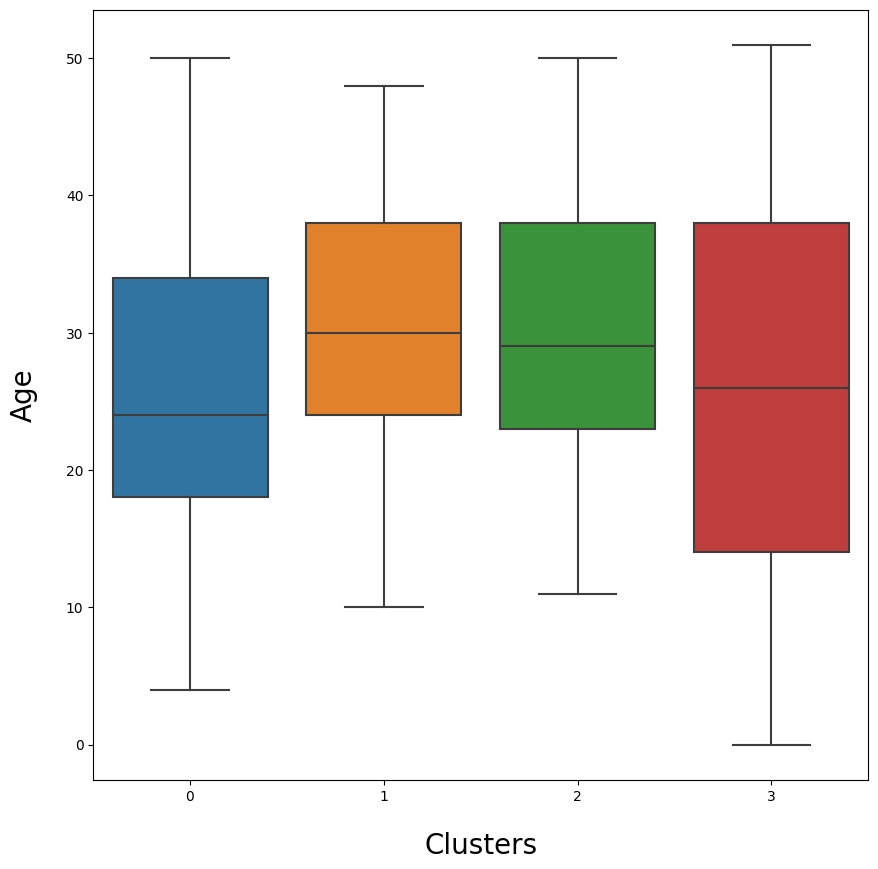

In [967]:
plt.figure(figsize=(10,10))

sns.boxplot(data=t, x='cluster', y = 'age');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20);

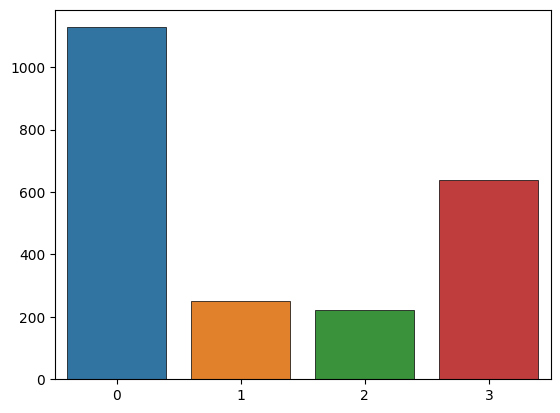

In [968]:
# Number of clusters
#k = 4
#kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 69)

#Returns a label for each data point based on the number of clusters

#y = kmeans.fit_predict(t)

#t['cluster'] = y

#t['cluster'].value_counts()

cluster = sns.barplot(y=t['cluster'].value_counts().values,x=t['cluster'].value_counts().index,linewidth=0.5,ec='black')
plt.show()

In [969]:
t

,income,age,total_spent,children,marital_status,cluster
0,1170,39,907,0,1,3
1,832,42,21,2,1,1
2,1567,31,503,0,2,3
3,241,12,47,1,2,0
4,1173,15,320,1,0,0
...,...,...,...,...,...,...
2235,1253,29,799,1,0,0
2236,1339,50,335,3,2,2
2237,1133,15,759,0,1,3
2238,1491,40,537,1,2,0


In [971]:
t['cluster'].value_counts()

0    1128
3     638
1     252
2     222
Name: cluster, dtype: int64

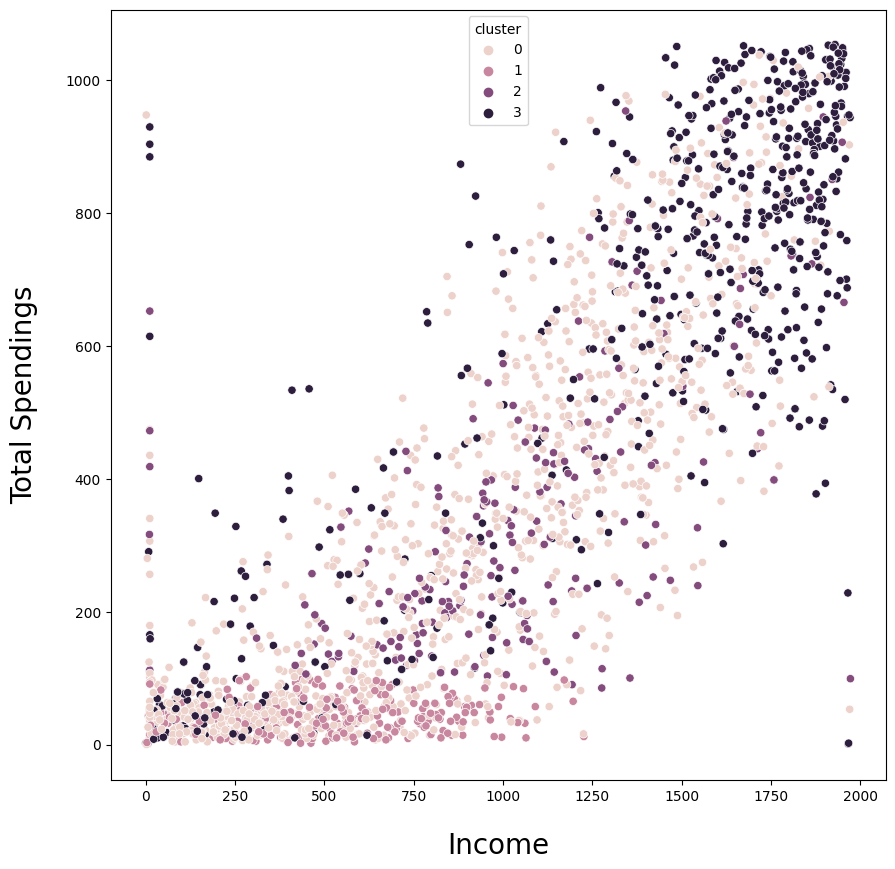

In [970]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=t, x='income', y='total_spent', hue='cluster');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

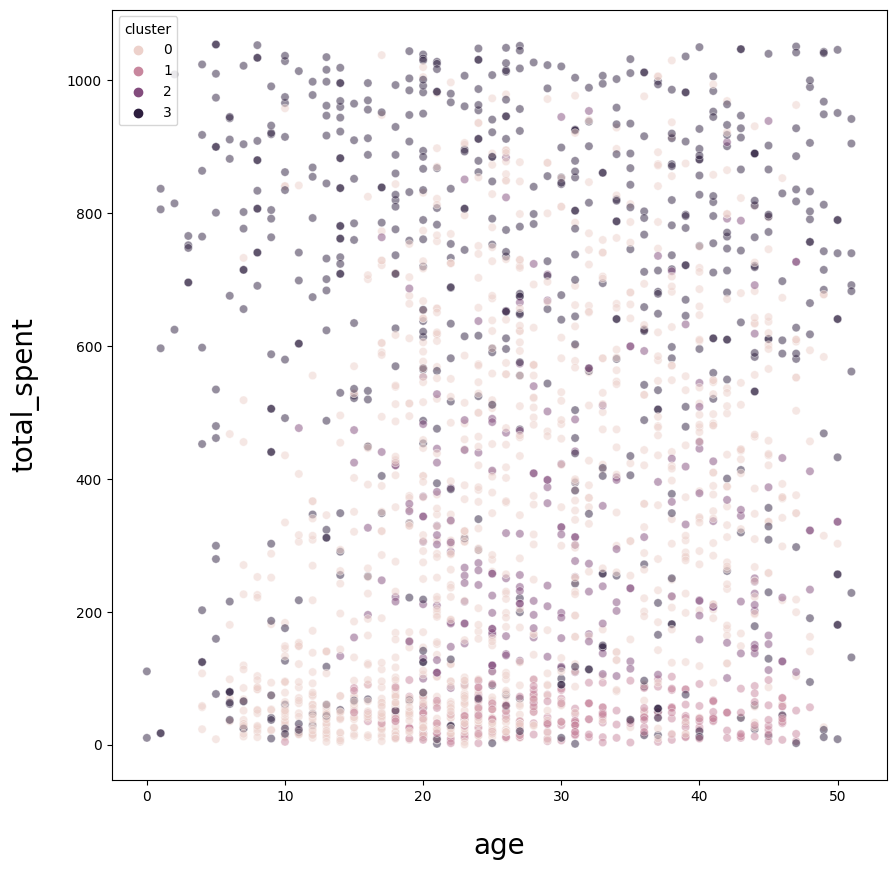

In [977]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=t, x='age', y='total_spent', hue='cluster',alpha = 0.5);
plt.xlabel('age', fontsize=20, labelpad=20)
plt.ylabel('total_spent', fontsize=20, labelpad=20);

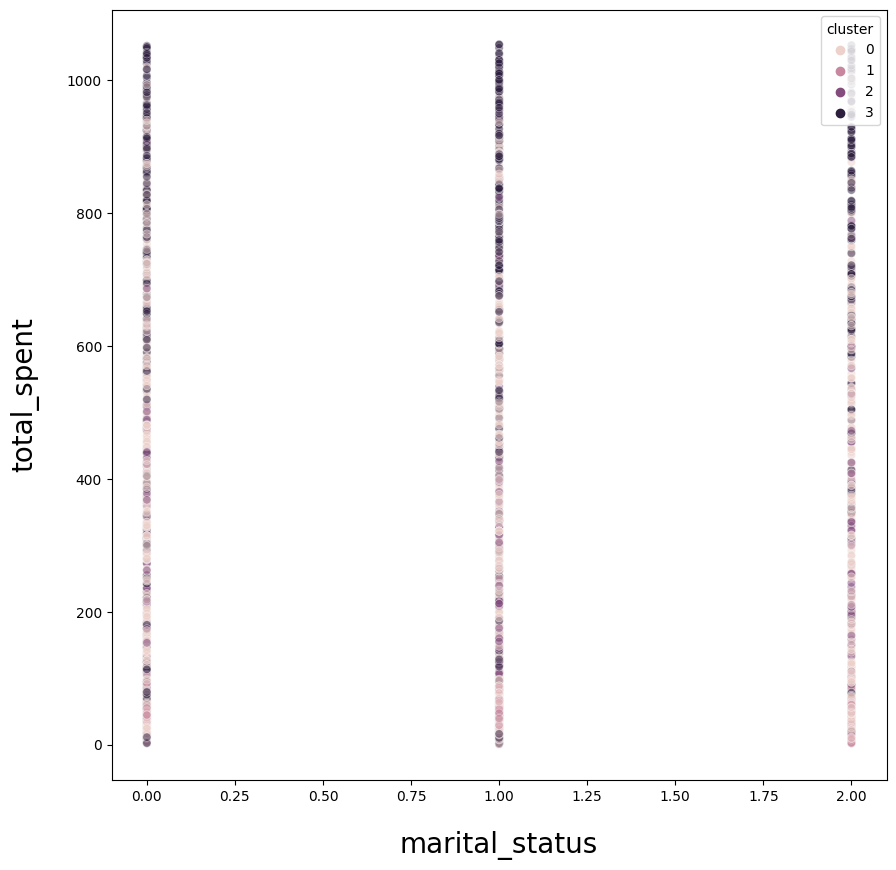

In [978]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=t, x='marital_status', y='total_spent', hue='cluster',alpha = 0.5);
plt.xlabel('marital_status', fontsize=20, labelpad=20)
plt.ylabel('total_spent', fontsize=20, labelpad=20);

## Conclusions ##

So, the result of the analysis is the allocation of 4 groups of customers:  
1) The lowest and low income, the lowest and low expenses, in a relationship, 1 child; These are customers who are member of young families (18-33 years old); A  lower-income group.
2) The lowest income, small expenses, in a relationship, 25-25 years old, 2 children, most likely, these people save and react to discounts;
3) Low income and expenses; customers are not distinguished by special behavior;
4) Large incomes and expenses, no children, any age. The higher-income group.

Customers are primarily middle aged with a bachelors degree. A majority of them are married with at least one child.
Customers spend the most on meat and wine products. Those without children seem to spend more on average than those with children. 
Marketing efforts should be directed to wine products with a focus on single/unmarried customers. It is also necessary to raise the demand for fruits and sweets. Company needs to run promotions for these products in order to increase the revenue from it.

In my opinion, it is necessary to adapt the marketing mix to these segments, because this will attract customers to purchases and increase their loyalty.